<a href="https://colab.research.google.com/github/sonchangwoo95/github-slideshow/blob/master/LSTM_SS_%ED%91%9C%EC%A4%80%ED%99%94Test_%EC%8B%A4%EC%A0%9C%EA%B0%92%ED%99%98%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [15]:
data = pd.read_csv('sample_data/005930.KS_filter.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-01,25980,26180,25420,25580,22242.25781,13557800
1,2016-04-04,25580,26100,25580,26100,22694.39844,9402300
2,2016-04-05,25980,25980,25200,25200,21911.83789,11815950
3,2016-04-06,25380,25820,25360,25700,22346.59375,9211700
4,2016-04-07,26000,26000,25160,25380,22068.34766,12939750


In [16]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [17]:
mid_prices

array([25800., 25840., 25590., ..., 81800., 82050., 82500.])

In [18]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])   # 슬라이싱_자르기. (: 기준) 앞은 0부터 포함해서 사용, 뒤는 포함 안함
                                                                # append : 리스트 뒤에 요소를 추가한다. (cf, expend : 리스트에 리스트를 뒤에 추가)

result

[array([25800., 25840., 25590., 25590., 25580., 25090., 25170., 25470.,
        25910., 26000., 25970., 25790., 25820., 25890., 25710., 25560.,
        25880., 25860., 25610., 25090., 25070., 25260., 25520., 25850.,
        25880., 25860., 25670., 25320., 25100., 25140., 25260., 25430.,
        25490., 25550., 25570., 25720., 25980., 25740., 25710., 25680.,
        26360., 27180., 27430., 27820., 28080., 28360., 28290., 27580.,
        27550., 27990., 28120.]),
 array([25840., 25590., 25590., 25580., 25090., 25170., 25470., 25910.,
        26000., 25970., 25790., 25820., 25890., 25710., 25560., 25880.,
        25860., 25610., 25090., 25070., 25260., 25520., 25850., 25880.,
        25860., 25670., 25320., 25100., 25140., 25260., 25430., 25490.,
        25550., 25570., 25720., 25980., 25740., 25710., 25680., 26360.,
        27180., 27430., 27820., 28080., 28360., 28290., 27580., 27550.,
        27990., 28120., 28450.]),
 array([25590., 25590., 25580., 25090., 25170., 25470., 25910., 2600

In [ ]:
# result.shape 형태 알려고 하니 에러 발생, [array([ , , , ])]의 형태 ==> array([[ , , , ]])로 변경필요
result.shape

AttributeError: ignored

In [19]:
# array([[ , , , ]])로 변경
result = np.array(result)
result

array([[25800., 25840., 25590., ..., 27550., 27990., 28120.],
       [25840., 25590., 25590., ..., 27990., 28120., 28450.],
       [25590., 25590., 25580., ..., 28120., 28450., 28740.],
       ...,
       [90150., 89350., 89900., ..., 81450., 81300., 81350.],
       [89350., 89900., 85700., ..., 81300., 81350., 81800.],
       [89900., 85700., 85800., ..., 81350., 81800., 82050.]])

In [ ]:
# txt로 저장 (구분은 공백으로)
np.savetxt('myDF.txt', result, delimiter=" ")

# 참고 : csv 읽어오기
# data = pd.read_csv('sample_data/005930.KS_filter.csv')

In [20]:
result_normal = []
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]       # (중요) 리스트 컴프리헨션 : 기존 리스트를 이용하여 새로운 리스트를 만든다 
    normalized_data.append(normalized_window)                                       # Normalize, x' = (xi/x0 - 1) : 0을 기준으로 +/- 로 분포시킴 (Z값 변환하는것은?)
                                                                                    # float(p) : 캐스팅, 소숫점 형태 변환
result_normal = np.array(normalized_data)

result_normal

# # txt로 저장 (구분은 공백으로)
# np.savetxt('myDF_normal.txt', result_normal, delimiter=" ")

array([[ 0.        ,  0.00155039, -0.00813953, ...,  0.06782946,
         0.08488372,  0.08992248],
       [ 0.        , -0.00967492, -0.00967492, ...,  0.08320433,
         0.08823529,  0.10100619],
       [ 0.        ,  0.        , -0.00039078, ...,  0.09886674,
         0.11176241,  0.12309496],
       ...,
       [ 0.        , -0.0088741 , -0.00277316, ..., -0.09650582,
        -0.09816972, -0.09761509],
       [ 0.        ,  0.00615557, -0.04085059, ..., -0.09009513,
        -0.08953553, -0.08449916],
       [ 0.        , -0.04671858, -0.04560623, ..., -0.09510567,
        -0.09010011, -0.08731924]])

In [ ]:
result_normal.shape

(1175, 51)

In [ ]:
result_normal

array([[ 0.        , -0.00305577, -0.00763942, ...,  0.05882353,
         0.08174179,  0.08250573],
       [ 0.        , -0.0045977 , -0.01072797, ...,  0.08505747,
         0.08582375,  0.09961686],
       [ 0.        , -0.00615858,  0.00076982, ...,  0.09083911,
         0.10469592,  0.11470362],
       ...,
       [ 0.        , -0.01315789,  0.00657895, ..., -0.0997807 ,
        -0.10526316, -0.10416667],
       [ 0.        ,  0.02      , -0.03      , ..., -0.09333333,
        -0.09222222, -0.08555556],
       [ 0.        , -0.04901961, -0.04139434, ..., -0.11002179,
        -0.10348584, -0.09912854]])

In [25]:
# split train and test data
row = int(round(result_normal.shape[0] * 0.9))
train = result_normal[:row, :]
np.random.shuffle(train)                            # 섞기

# 선언
#y_real_test =[]

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))          # Array 3차원 변환
y_train = train[:, -1]

x_test = result_normal[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result_normal[row:, -1]

# Normalization 하지 않은 실제 y_real_test
y_real_test = result[row:, -1]
# y_real_test.shape

# x_test용 Array DB에서 세로축 맨 앞의 값만 추출
x_base_test = result[row:, 1] 
# array([ , , , ]) ==> array([],[],[]) 변환 (@ 중요)
# x_base_test = np.reshape(x_base_test,(row,1)) <== row 쓰면, Error 발생
# x_base_test = np.reshape(x_base_test,(117,1)) Error 안남
x_base_test = np.reshape(x_base_test,(x_base_test.shape[0],1)) # Error 안남

x_train.shape, x_test.shape, y_train.shape, x_base_test.shape, x_base_test

# # txt로 저장 (구분은 공백으로)
# np.savetxt('x_train.txt', x_train, delimiter=" ")       # 3D로 표현되네.... 그래서 에러남
# np.savetxt('y_train.txt', y_train, delimiter=" ")
# np.savetxt('x_test.txt', x_test, delimiter=" ")
# np.savetxt('y_test.txt', y_test, delimiter=" ")
# np.savetxt('y_real_test.txt', y_real_test, delimiter=" ")

((1058, 50, 1), (117, 50, 1), (1058,), (117, 1), array([[57600.],
        [59500.],
        [59550.],
        [58650.],
        [57300.],
        [57550.],
        [56900.],
        [57750.],
        [57750.],
        [57900.],
        [58650.],
        [58350.],
        [58800.],
        [58050.],
        [58950.],
        [58500.],
        [56450.],
        [56350.],
        [56000.],
        [56450.],
        [56100.],
        [55950.],
        [55850.],
        [55050.],
        [54450.],
        [54600.],
        [56100.],
        [55450.],
        [56550.],
        [57950.],
        [58550.],
        [59550.],
        [58800.],
        [60350.],
        [60750.],
        [60950.],
        [60050.],
        [59500.],
        [59500.],
        [58750.],
        [58100.],
        [58100.],
        [57950.],
        [58350.],
        [58600.],
        [58350.],
        [59300.],
        [59200.],
        [60100.],
        [60150.],
        [60900.],
        [60800.],
        [60250.]

In [ ]:
x_train

array([[[ 0.        ],
        [ 0.01639344],
        [-0.00351288],
        ...,
        [-0.08665105],
        [-0.0991413 ],
        [-0.08079625]],

       [[ 0.        ],
        [-0.00240732],
        [ 0.01540684],
        ...,
        [ 0.09051517],
        [ 0.09966298],
        [ 0.11844006]],

       [[ 0.        ],
        [-0.01237113],
        [-0.02525773],
        ...,
        [ 0.09175258],
        [ 0.08195876],
        [ 0.07938144]],

       ...,

       [[ 0.        ],
        [ 0.0250298 ],
        [ 0.03337306],
        ...,
        [-0.0727056 ],
        [-0.06555423],
        [-0.05601907]],

       [[ 0.        ],
        [-0.00185529],
        [ 0.01360544],
        ...,
        [ 0.13234385],
        [ 0.1292517 ],
        [ 0.11502783]],

       [[ 0.        ],
        [ 0.0004158 ],
        [ 0.01663202],
        ...,
        [ 0.04407484],
        [ 0.04781705],
        [ 0.04615385]]])

In [26]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
106/106 [==============================] - 8s 48ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 2/20
106/106 [==============================] - 4s 39ms/step - loss: 9.0476e-04 - val_loss: 0.0033
Epoch 3/20
106/106 [==============================] - 4s 40ms/step - loss: 6.2710e-04 - val_loss: 7.4846e-04
Epoch 4/20
106/106 [==============================] - 4s 39ms/step - loss: 4.5129e-04 - val_loss: 0.0022
Epoch 5/20
106/106 [==============================] - 4s 39ms/step - loss: 3.6071e-04 - val_loss: 5.9688e-04
Epoch 6/20
106/106 [==============================] - 4s 39ms/step - loss: 3.0556e-04 - val_loss: 5.3232e-04
Epoch 7/20
106/106 [==============================] - 4s 39ms/step - loss: 2.8843e-04 - val_loss: 5.3313e-04
Epoch 8/20
106/106 [==============================] - 4s 39ms/step - loss: 2.5259e-04 - val_loss: 5.1536e-04
Epoch 9/20
106/106 [==============================] - 4s 40ms/step - loss: 2.7036e-04 - val_loss: 5.3688e-04
Epoch 10/20
106/106 [==============

In [28]:
pred = model.predict(x_test)

In [29]:
y_real_test

array([60150., 60900., 60800., 60250., 59700., 59850., 60500., 61050.,
       60150., 60100., 60600., 59900., 59100., 58000., 57300., 56750.,
       58250., 58400., 59550., 60200., 60500., 60000., 60900., 61050.,
       62100., 65300., 66300., 65450., 64350., 64550., 66250., 68250.,
       67400., 67000., 68000., 67650., 67700., 69100., 69900., 71100.,
       72700., 72250., 72950., 73150., 73450., 73850., 73700., 73950.,
       73150., 73350., 72700., 72650., 73150., 76400., 79150., 78100.,
       79300., 82300., 82750., 83300., 83450., 86500., 93150., 89600.,
       90150., 89350., 89900., 85700., 85800., 87750., 87550., 88250.,
       88100., 87850., 86650., 84400., 83500., 82200., 85050., 84400.,
       82950., 83250., 83600., 83750., 82100., 83900., 85100., 83600.,
       82850., 81900., 83200., 82000., 82450., 84200., 82700., 84150.,
       83400., 82700., 81850., 82300., 81250., 81600., 81750., 82950.,
       82350., 82550., 82450., 83200., 82150., 82000., 82350., 81150.,
      

In [30]:
y_real_test.shape

(117,)

In [32]:
# array([ , , , ]) ==> array([],[],[]) 변환
#y_real_test = np.reshape(y_real_test,(117,1))
y_real_test = np.reshape(y_real_test,(y_real_test.shape[0],1))

y_real_test

array([[60150.],
       [60900.],
       [60800.],
       [60250.],
       [59700.],
       [59850.],
       [60500.],
       [61050.],
       [60150.],
       [60100.],
       [60600.],
       [59900.],
       [59100.],
       [58000.],
       [57300.],
       [56750.],
       [58250.],
       [58400.],
       [59550.],
       [60200.],
       [60500.],
       [60000.],
       [60900.],
       [61050.],
       [62100.],
       [65300.],
       [66300.],
       [65450.],
       [64350.],
       [64550.],
       [66250.],
       [68250.],
       [67400.],
       [67000.],
       [68000.],
       [67650.],
       [67700.],
       [69100.],
       [69900.],
       [71100.],
       [72700.],
       [72250.],
       [72950.],
       [73150.],
       [73450.],
       [73850.],
       [73700.],
       [73950.],
       [73150.],
       [73350.],
       [72700.],
       [72650.],
       [73150.],
       [76400.],
       [79150.],
       [78100.],
       [79300.],
       [82300.],
       [82750.

In [33]:
y_real_test.shape

(117, 1)

In [34]:
pred.shape

(117, 1)

In [35]:
# 예측값을 원래단위로 환산
# normalized_data = []
# for window in result:
#     normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
#     # normalized_window = [(float(p)) for p in window]
#     normalized_data.append(normalized_window)

expect = []

# for i in y_real_test:
#     expect_window = (pred[i] + 1) * y_real_test[i]
#     expect.append(expect_winodw)

# expect = [ (pred[i] + 1) * y_real_test[i] for i in window]
#expect.append(expect_window)

expect = (pred + 1) * x_base_test

expect

array([[63168.82553101],
       [62260.13034582],
       [61129.50818539],
       [59944.4503963 ],
       [58770.50460577],
       [59882.1085155 ],
       [59286.47947311],
       [61675.86860061],
       [61286.43545508],
       [60196.99598551],
       [60872.04324603],
       [60517.91265607],
       [60351.25279427],
       [58217.76396632],
       [58765.49242437],
       [56826.23183727],
       [54800.82120895],
       [58613.84562254],
       [58313.55762482],
       [60322.24450707],
       [60082.83137083],
       [60443.78398061],
       [59810.93473434],
       [60221.59495354],
       [60531.69817328],
       [62501.97658539],
       [67859.01317596],
       [65824.75742102],
       [66357.00616837],
       [65542.10180044],
       [65262.00433969],
       [67869.43643689],
       [67934.1366291 ],
       [68995.64760327],
       [67218.25459599],
       [68483.67467523],
       [66705.55321574],
       [67070.18077374],
       [69459.98096466],
       [69292.43043065],


In [ ]:
expect

array([[63741.55468941],
       [61633.97731781],
       [60812.92290688],
       [60200.48971176],
       [58646.52317762],
       [60187.70833015],
       [59216.03947878],
       [61592.07220078],
       [61234.12313461],
       [59922.19042778],
       [61244.66776848],
       [60348.53899479],
       [60505.80034256],
       [57776.91688538],
       [59602.43182778],
       [57026.93243027],
       [55679.58297729],
       [58095.85797787],
       [58442.96970367],
       [60294.28071976],
       [60157.36222267],
       [60255.13062477],
       [60012.71185875],
       [60857.33377934],
       [59579.0459156 ],
       [63268.90909672],
       [68510.87329388],
       [65336.01307869],
       [67084.89840031],
       [65574.72169399],
       [65420.04032135],
       [68476.4957428 ],
       [68507.38942623],
       [69108.65135193],
       [67579.23996449],
       [68287.1673584 ],
       [67601.82228088],
       [66774.14075136],
       [69685.75716019],
       [69684.67065096],


# 실제값으로 추적되는 그래프를 **표현**

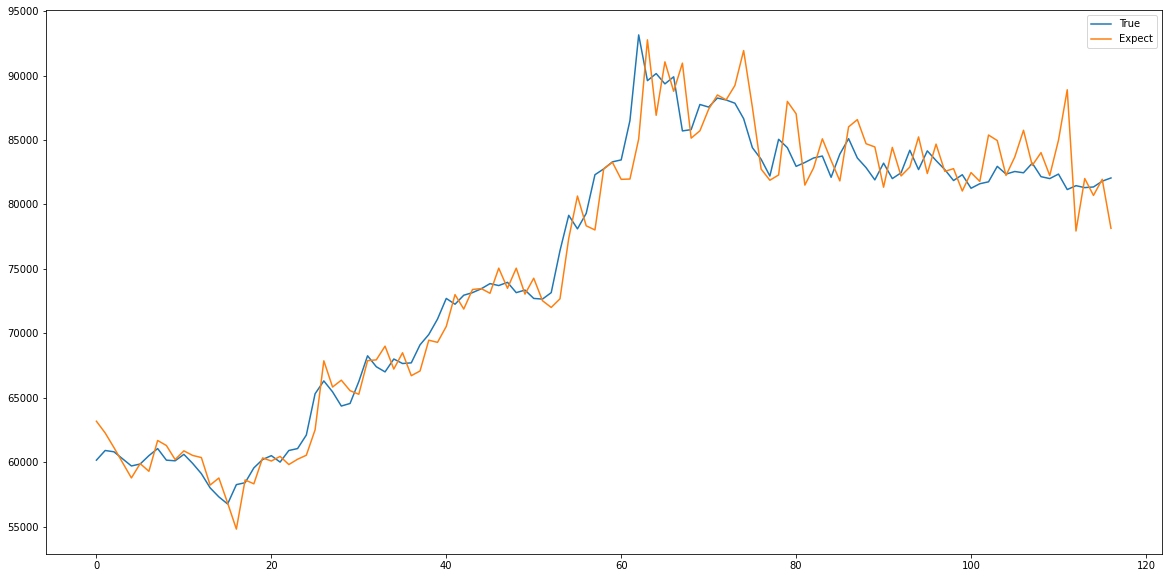

In [36]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)

# 표준화 이전값으로 변경을해서 그래프 표시
ax.plot(y_real_test, label='True')
ax.plot(expect, label='Expect')

ax.legend()
plt.show()

Nomalized 시켜서 변형된 값으로 추정하는 그래프

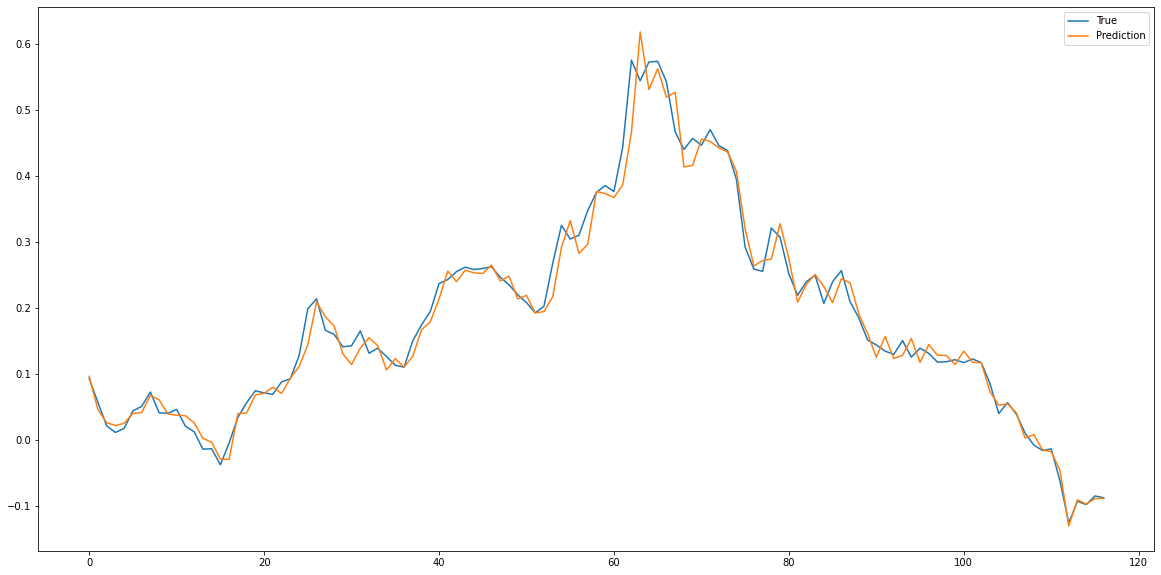

In [37]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
# Normalization으로 변환했을 예측값
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')

ax.legend()
plt.show()

1 코드 깔끔하게 정리하기\
2 코드와 표로 내용 설명

3 하루 이후의 주식값을 예측하지 않고, 5일 후의 주식값을 예측하는 PGM 만들기